In [11]:
#-*- coding : utf-8-*-
# coding:unicode_escape
import pandas as pd
import numpy as np

data = pd.read_csv(r'D:\Crawler\51job\人力-1-模型.csv', encoding='gb18030')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Crawler\\51job\\人力-1-模型.csv.csv'

In [2]:
data.dropna(inplace=True,axis=0)

In [3]:
data['月薪'] = (data['月薪最大值']+data['月薪最小值'])/2

In [4]:
data.head()

,职位名称,薪酬,城市地区,工作经验要求,学历要求,公司福利,公司名称,规模类型,公司标签,地区,薪酬_n,月薪最小值,月薪最大值,公司规模,公司类型,平均薪资,工资级别,月薪
0,人力资源管理岗,1-2万,南昌·青山湖区,5-7年,硕士,节假日福利\n五险一金,赣江新区创新产业投资有限公司,民营 | 50-150人,金融/投资/证券,二线,10000-20000,10000.0,20000.0,50-150人,民营,15000,二级,15000.0
1,人力资源管理岗,8千-1.6万·13薪,芜湖·鸠江区,5-7年,大专,五险一金\n员工旅游\n定期体检\n周末双休\n免费工作餐\n高温补贴,芜湖麦可威电磁科技有限公司,民营 | 150-500人,电子技术/半导体/集成电路,三线,8000-16000,8000.0,16000.0,150-500人,民营,12000,三级,12000.0
2,人力资源管理岗,8千-1.5万,北京,5-7年,本科,招聘\n人才梯队\n职称评审\n人才管理体系\n五险一金\n补充医疗保险\n交通补贴\n餐饮...,中国核工业中原建设有限公司华东分公司,国企 | 150-500人,建筑/建材/工程,一线,8000-15000,8000.0,15000.0,150-500人,国企,11500,三级,11500.0
3,企业人力资源管理培训师,9千-1.8万,东莞·南城区,3-4年,本科,五险一金\n员工旅游\n通讯补贴\n专业培训\n绩效奖金\n年终奖金\n定期体检\n弹性工作,广东向上人力资源有限公司,民营 | 50-150人,专业服务(咨询、人力资源、财会),新一线,9000-18000,9000.0,18000.0,50-150人,民营,13500,二级,13500.0
4,人力资源管理,5-9千·13薪,扬州,3-4年,本科,五险一金\n专业培训\n股票期权\n年终奖金\n周末双休,江苏奥力威传感高科股份有限公司,已上市 | 500-1000人,汽车,三线,5000-9000,5000.0,9000.0,500-1000人,已上市,7000,四级,7000.0


In [7]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

# 假设您已经有一个包含特征和标签的数据集，可以使用以下代码导入数据：

X = data[['地区', '工作经验要求', '学历要求', '公司规模', '公司类型', '公司标签']]
y = data['工资级别']
# 对于分类特征，需要进行独热编码。
X = pd.get_dummies(X, columns=['地区', '工作经验要求', '学历要求', '公司规模', '公司类型', '公司标签'])

In [8]:
data1 = pd.concat([X,y],axis=1)
data1

,地区_一线,地区_三线,地区_二线,地区_五线,地区_四线,地区_新一线,工作经验要求_10年以上,工作经验要求_1年,工作经验要求_2年,工作经验要求_3-4年,...,公司标签_计算机软件,公司标签_贸易/进出口,公司标签_通信/电信/网络设备,公司标签_通信/电信运营、增值服务,公司标签_酒店/旅游,公司标签_采掘业/冶炼,公司标签_金融/投资/证券,公司标签_银行,公司标签_餐饮业,工资级别
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,二级
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,三级
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,三级
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,二级
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,四级
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,三级
900,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,四级
901,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,四级
902,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,三级


In [10]:
fd = pd.DataFrame(data1)
fd.to_csv('人力-1-特征-分类.csv',header = True,index=0)

In [10]:
from sklearn.ensemble import RandomForestRegressor

# 创建一个随机森林回归模型，并拟合数据。
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 计算各特征的重要性。
feature_importance = model.feature_importances_


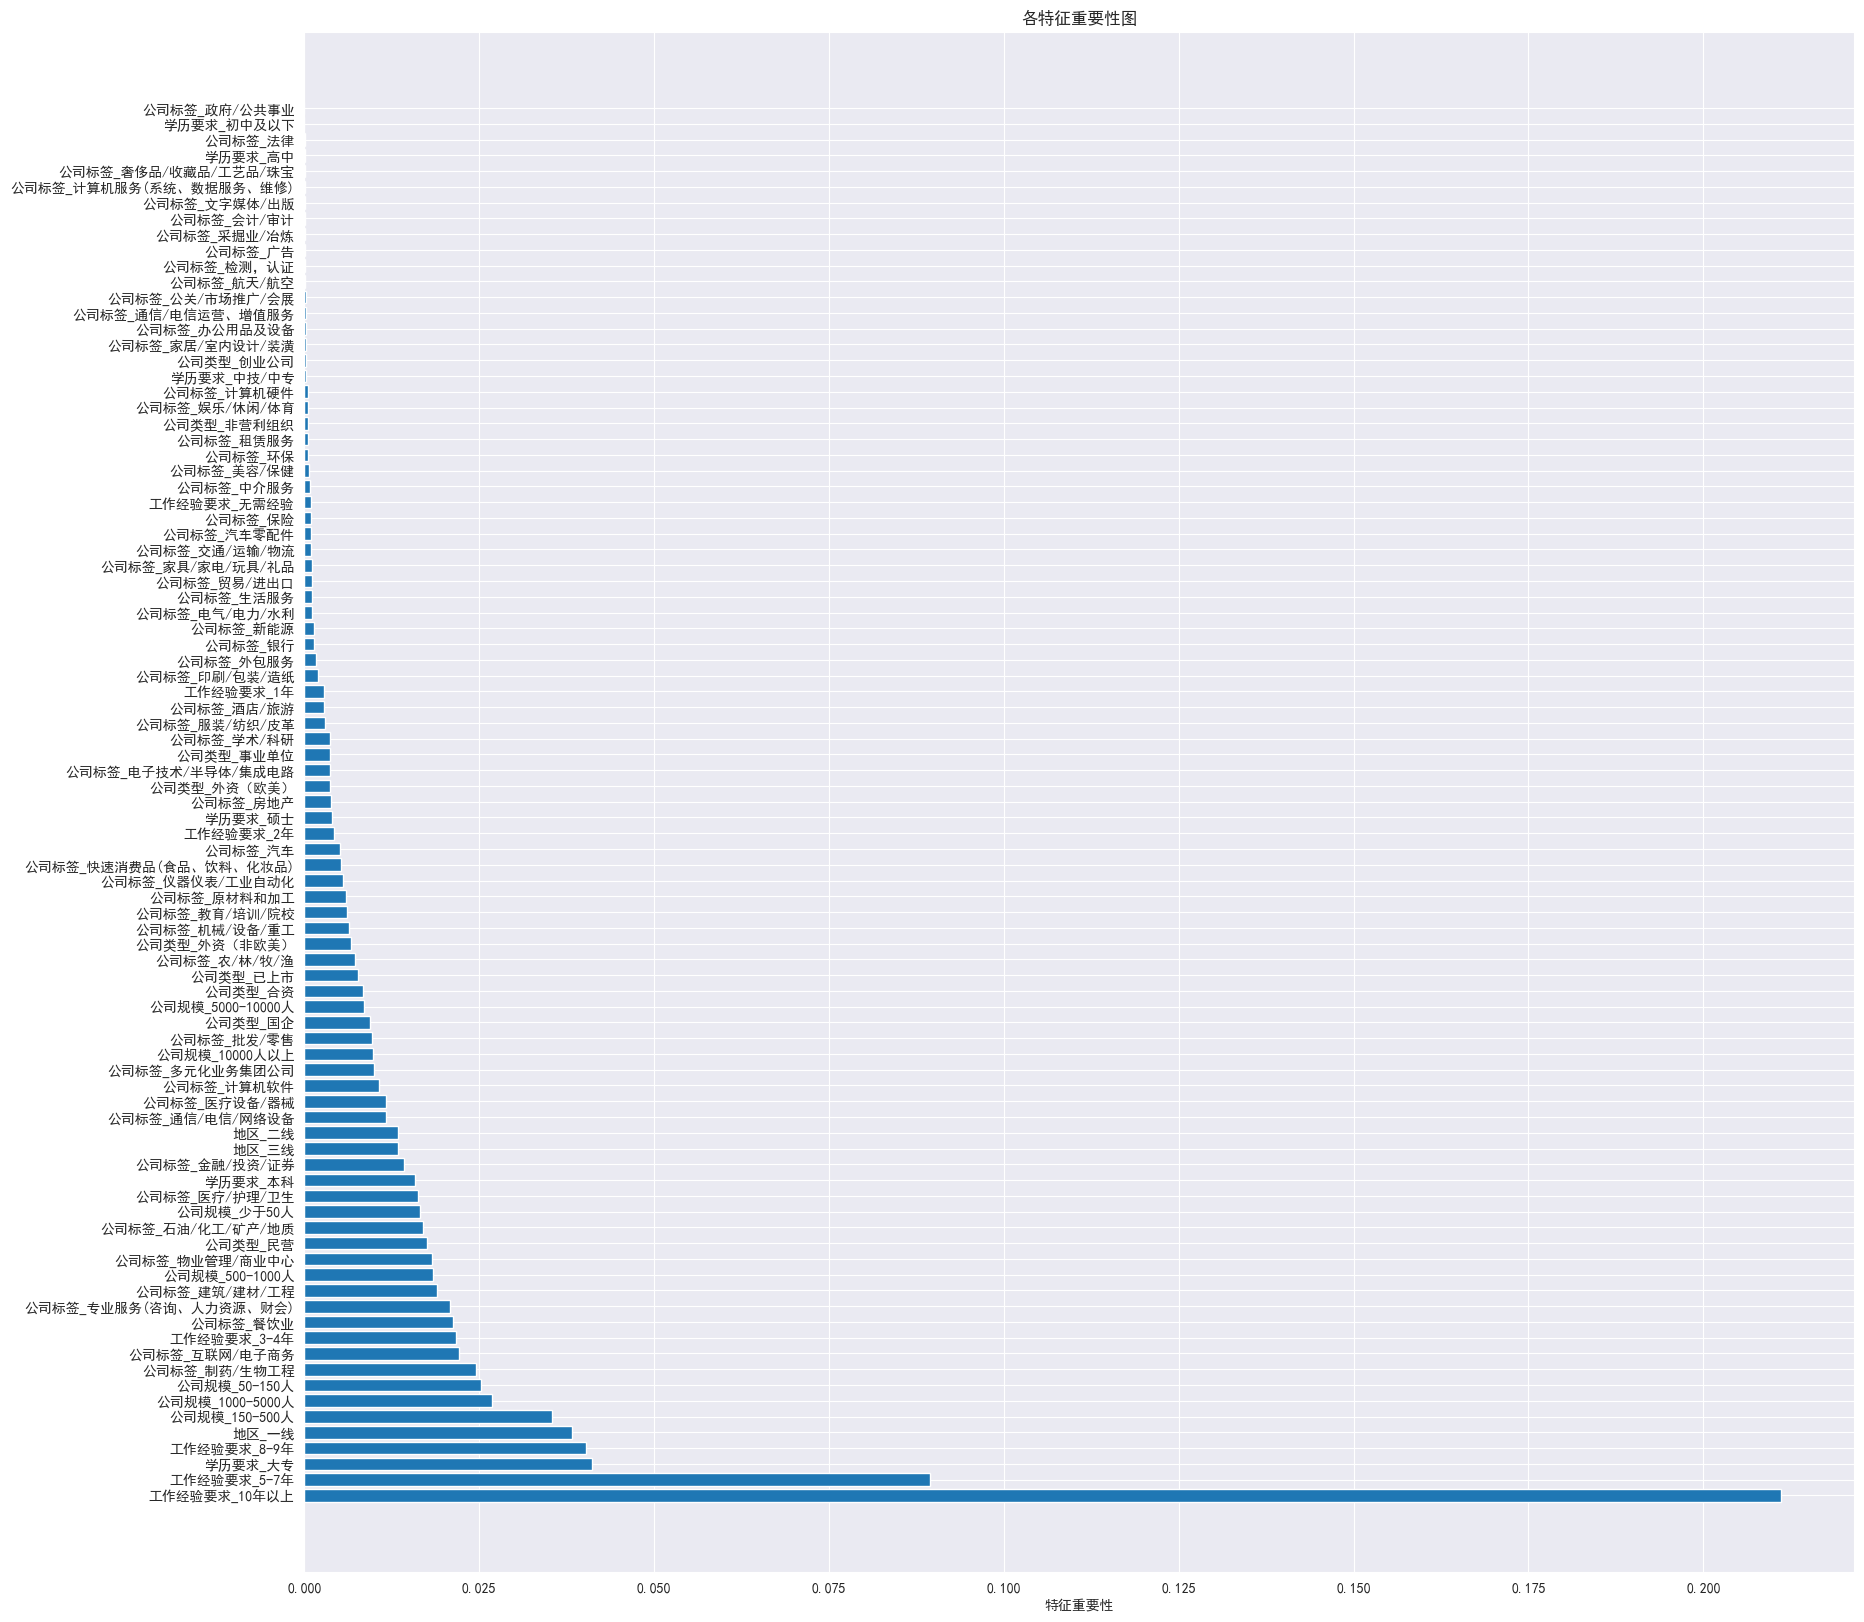

In [36]:

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  # 显示中文
# 将各特征的重要性按照从大到小的顺序排列。
sorted_idx = feature_importance.argsort()[::-1]
pos = np.arange(sorted_idx.shape[0]) + 0.5

# 画出特征重要性柱状图。
plt.figure(figsize=(20, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('特征重要性')
plt.title('各特征重要性图')
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [13]:
from scipy import stats

y = stats.boxcox(y)[0]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ss = StandardScaler()
X_train = ss.fit_transform(X_train) # fit_transform for train data
X_test = ss.transform(X_test)

In [15]:
X_train

array([[ 1.37641972, -0.88873791, -0.52058814, ..., -0.14373989,
        -0.06375767, -0.19069252],
       [-0.72652257, -0.88873791,  1.92090432, ..., -0.14373989,
        -0.06375767, -0.19069252],
       [ 1.37641972, -0.88873791, -0.52058814, ..., -0.14373989,
        -0.06375767, -0.19069252],
       ...,
       [-0.72652257, -0.88873791,  1.92090432, ..., -0.14373989,
        -0.06375767, -0.19069252],
       [-0.72652257,  1.12519112, -0.52058814, ..., -0.14373989,
        -0.06375767, -0.19069252],
       [ 1.37641972, -0.88873791, -0.52058814, ..., -0.14373989,
        -0.06375767, -0.19069252]])

In [16]:
y

array([2.42026388, 2.41549866, 2.41453991, 2.41806749, 2.40204681,
       2.41453991, 2.39203379, 2.41883623, 2.42217166, 2.41453991,
       2.39500986, 2.41453991, 2.41453991, 2.41453991, 2.41453991,
       2.40868461, 2.39995702, 2.43123181, 2.41453991, 2.41640288,
       2.40868461, 2.40393681, 2.41309466, 2.41127272, 2.41243433,
       2.40565764, 2.41640288, 2.38860751, 2.39762834, 2.41002652,
       2.42026388, 2.39203379, 2.41127272, 2.40393681, 2.38860751,
       2.43490022, 2.40797371, 2.40868461, 2.40393681, 2.39500986,
       2.41127272, 2.40868461, 2.38460024, 2.43678258, 2.39635909,
       2.39500986, 2.39357161, 2.40204681, 2.40565764, 2.40565764,
       2.40868461, 2.41806749, 2.40204681, 2.41127272, 2.41127272,
       2.41640288, 2.41127272, 2.42026388, 2.40723368, 2.41127272,
       2.40565764, 2.40868461, 2.41127272, 2.42331323, 2.41127272,
       2.39995702, 2.41453991, 2.41640288, 2.41640288, 2.41640288,
       2.43678258, 2.41640288, 2.40868461, 2.40565764, 2.41640

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

models=[LinearRegression(),KNeighborsRegressor(),SVR(),Ridge(),Lasso(),MLPRegressor(alpha=20),DecisionTreeRegressor(),ExtraTreeRegressor(),XGBRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor()]
models_str=['LinearRegression','KNNRegressor','SVR','Ridge','Lasso','MLPRegressor','DecisionTree','ExtraTree','XGBoost','RandomForest','AdaBoost','GradientBoost','Bagging']
score_=[]

In [18]:
for name,model in zip(models_str,models):
    # print('开始训练模型：'+name)
    model=model   #建立模型
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=model.score(X_test,y_test)
    score_.append(str(score)[:5])
    print(name +' 得分:'+str(score))

LinearRegression 得分:-1.843583751754057e+24
KNNRegressor 得分:0.23259525970894313
SVR 得分:-0.004954458084546198
Ridge 得分:0.5202381254048107
Lasso 得分:-0.0011603698543820595


D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor 得分:-1.7420994275795234
DecisionTree 得分:0.33020971122719467
ExtraTree 得分:0.29609741978840765
[17:10:44] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost 得分:0.510321164480835
RandomForest 得分:0.5360048464266276
AdaBoost 得分:0.37026081393005394
GradientBoost 得分:0.5342772980117072
Bagging 得分:0.5205679622706629


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
bag_clf = BaggingRegressor(DecisionTreeRegressor(),
                            n_estimators=500,
                            max_samples=100,
                            bootstrap=True,
                            n_jobs=-1,
                            random_state=42
                            )
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print(r2_score(y_test, y_pred))

0.4982154362590866


In [20]:
# 3.2 Boosting
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate = 0.1)
GBC.fit(X_train, y_train)
gbc1 = GBC.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, gbc1)))
print(mean_absolute_error(y_test, gbc1))
print(r2_score(y_test, gbc1))

0.008694944005255752
0.006898990294571511
0.5010176666257338


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#把要调整的参数以及其候选值 列出来；
param_grid = {"max_features": [4,5,6,7,8],
              'n_estimators': [4,6,20,70,80],
              'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]
              }
print("Parameters:{}".format(param_grid))

grid_search = GridSearchCV(GBC, param_grid, cv=5)  #实例化一个GridSearchCV类

grid_search.fit(X_train, y_train)  #训练，找到最优的参数，同时使用最优的参数实例化一个新的SVC estimator。
print("Test set score:{:.2f}".format(grid_search.score(X_test, y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

Parameters:{'max_features': [4, 5, 6, 7, 8], 'n_estimators': [4, 6, 20, 70, 80], 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25]}
Test set score:0.51
Best parameters:{'learning_rate': 0.25, 'max_features': 7, 'n_estimators': 80}
Best score on train set:0.43


In [22]:
# 3.2 Boosting
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingRegressor(max_depth=6, n_estimators=70, learning_rate = 0.1, max_features=4)
GBC.fit(X_train, y_train)
gbc1 = GBC.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, gbc1)))
print(mean_absolute_error(y_test, gbc1))
print(r2_score(y_test, gbc1))

0.008481650204133691
0.0066485715861465495
0.5251982558914006


In [23]:
# 3.2 Boosting
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingRegressor(max_depth=6, n_estimators=70, learning_rate = 0.1)
GBC.fit(X_train, y_train)
gbc1 = GBC.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, gbc1)))
print(mean_absolute_error(y_test, gbc1))
print(r2_score(y_test, gbc1))

0.008386531537598505
0.006466342349459545
0.5357880036443365


In [24]:
# 3.2 Boosting
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingRegressor(max_depth=6, n_estimators=70)
GBC.fit(X_train, y_train)
gbc1 = GBC.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, gbc1)))
print(mean_absolute_error(y_test, gbc1))
print(r2_score(y_test, gbc1))

0.008425136627355428
0.006501673594140147
0.5315044228157554


In [25]:
# 3.2.3 XGBoost
import xgboost as xgb
from sklearn import metrics
XGB = xgb.XGBRegressor(max_depth=6, n_estimators=70)

# 对训练集训练模型
XGB.fit(X_train,y_train)
# 对测试集进行预测
xgb1 = XGB.predict(X_test)


print(np.sqrt(mean_squared_error(y_test, xgb1)))
print(mean_absolute_error(y_test, xgb1))
print(r2_score(y_test, xgb1))

[17:11:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.008486647331330352
0.006704103446328643
0.5246386139358854


In [26]:
from sklearn.ensemble import GradientBoostingRegressor as GBDT
from sklearn.ensemble import ExtraTreesRegressor as ET
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import AdaBoostRegressor as ADA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

models = [GBDT(n_estimators=200),
          RF(n_estimators=200),
          ET(n_estimators=200),
          ADA(n_estimators=200)]

X_train_stack = np.zeros((X_train.shape[0], len(models)))
X_test_stack = np.zeros((X_test.shape[0], len(models)))


In [27]:
from sklearn.model_selection import KFold
n_folds = 10
kf = KFold(n_splits=n_folds)

for i, model in enumerate(models):
    X_stack_test_n = np.zeros((X_test.shape[0], n_folds))

    for j, (train_index, test_index) in enumerate(kf.split(X_train)):
        tr_x = X_train[train_index]
        tr_y = y_train[train_index]
        model.fit(tr_x, tr_y)

        # 生成stacking训练数据集
        X_train_stack[test_index, i] = model.predict(X_train[test_index])
        X_stack_test_n[:, j] = model.predict(X_test)

    # 生成stacking测试数据集
    X_test_stack[:, i] = X_stack_test_n.mean(axis=1)


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# 误差 = []
# for name, model in zip(models_str, models):
#     # print('开始训练模型：' + name)
#     model = model  #建立模型
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     MSE = mean_squared_error(y_test,y_pred)
#     RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
#     MAE = mean_absolute_error(y_test,y_pred)
#     R2 = r2_score(y_test,y_pred)
#     def ad_r2(y_test,result_prediction,train_df):
#         p = train_df.shape[0] # 特征数量
#         n = train_df.shape[1] # 样本数量
#         return (1-((1-r2_score(y_test,result_prediction))*(n-1))/(n-p-1))
#     ADR = ad_r2(y_test,y_pred,X_train)
#     print(name + ' MSE:' + str(MSE))
#     print(name + ' RMSE:' + str(RMSE))
#     print(name + ' MAE:' + str(MAE))

In [32]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
MAE = mean_absolute_error(y_test,y_pred)
model_second = LinearRegression()
model_second.fit(X_train_stack,y_train)
pred = model_second.predict(X_test_stack)

print('RMSE:' + str(RMSE))
print('MAE:' + str(MAE))
print("R2:", r2_score(y_test, pred))

RMSE:0.008719324751919463
MAE:0.006947109036793127
R2: 0.5531119280683103


In [35]:
# GBDT

model_1 = models[0]
model_1.fit(X_train,y_train)
pred_1 = model_1.predict(X_test)
MSE1 = mean_squared_error(y_test,pred_1)
RMSE1 = np.sqrt(mean_squared_error(y_test,pred_1))
MAE1 = mean_absolute_error(y_test,pred_1)

print("R2:", r2_score(y_test, pred_1))
print(name + ' RMSE:' + str(RMSE1))
print(name + ' MAE:' + str(MAE1))
# RF
model_2 = models[1]
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)

RMSE2 = np.sqrt(mean_squared_error(y_test,pred_2))
MAE2 = mean_absolute_error(y_test,pred_2)

print("R2:", r2_score(y_test, pred_2))
print(name + ' RMSE:' + str(RMSE2))
print(name + ' MAE:' + str(MAE2))
# ET
model_3 = models[2]
model_3.fit(X_train, y_train)
pred_3 = model_1.predict(X_test)
print("R2:", r2_score(y_test, pred_3))
RMSE3 = np.sqrt(mean_squared_error(y_test,pred_3))
MAE3 = mean_absolute_error(y_test,pred_3)
print(name + ' RMSE:' + str(RMSE3))
print(name + ' MAE:' + str(MAE3))
# ADA
model_4 = models[3]
model_4.fit(X_train, y_train)
pred_4 = model_4.predict(X_test)
print("R2:", r2_score(y_test, pred_4))
RMSE4 = np.sqrt(mean_squared_error(y_test,pred_4))
MAE4 = mean_absolute_error(y_test,pred_4)
print(name + ' RMSE:' + str(RMSE4))
print(name + ' MAE:' + str(MAE4))

R2: 0.5381281044986518
Bagging RMSE:0.008365366503934069
Bagging MAE:0.006577390898434133
R2: 0.5315715769451916
Bagging RMSE:0.008424532776412735
Bagging MAE:0.006338685629758232
R2: 0.5381281044986518
Bagging RMSE:0.008365366503934069
Bagging MAE:0.006577390898434133
R2: 0.3678671292676857
Bagging RMSE:0.009786522339561999
Bagging MAE:0.00779820318748612


In [186]:
from sklearn.ensemble import GradientBoostingDecisionTree as GBDT
from sklearn.ensemble import ExtraTreesRegressor as ET
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.ensemble import AdaBoostRegressor as ADA
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

models = [GBDT(n_estimators=200),
          RF(n_estimators=200),
          ET(n_estimators=200),
          GBR(n_estimators=200)]

X_train_stack = np.zeros((X_train.shape[0], len(models)))
X_test_stack = np.zeros((X_test.shape[0], len(models)))

from sklearn.model_selection import KFold

n_folds = 10
kf = KFold(n_splits=n_folds)

for i, model in enumerate(models):
    X_stack_test_n = np.zeros((X_test.shape[0], n_folds))

    for j, (train_index, test_index) in enumerate(kf.split(X_train)):
        tr_x = X_train[train_index]
        tr_y = y_train[train_index]
        model.fit(tr_x, tr_y)

        # 生成stacking训练数据集
        X_train_stack[test_index, i] = model.predict(X_train[test_index])
        X_stack_test_n[:, j] = model.predict(X_test)

    # 生成stacking测试数据集
    X_test_stack[:, i] = X_stack_test_n.mean(axis=1)

model_second = LinearRegression()
model_second.fit(X_train_stack, y_train)
pred = model_second.predict(X_test_stack)
print("R2:", r2_score(y_test, pred))


R2: 0.5577874854948583


In [188]:
# GBDT
model_1 = models[0]
model_1.fit(X_train,y_train)
pred_1 = model_1.predict(X_test)
print("R2:", r2_score(y_test, pred_1))

# RF
model_2 = models[1]
model_2.fit(X_train, y_train)
pred_2 = model_2.predict(X_test)
print("R2:", r2_score(y_test, pred_2))

# ET
model_3 = models[2]
model_3.fit(X_train, y_train)
pred_3 = model_1.predict(X_test)
print("R2:", r2_score(y_test, pred_3))

# gbr
model_4 = models[3]
model_4.fit(X_train, y_train)
pred_4 = model_4.predict(X_test)
print("R2:", r2_score(y_test, pred_4))


R2: 0.5351849412693197
R2: 0.49759369667962694
R2: 0.5351849412693197
R2: 0.5381069828876037


In [80]:
# 3.3 Stacking

from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression() # 第二阶段的方法

SC = StackingRegressor(regressors=[GBC, XGB], meta_regressor=lr)
SC.fit(X_train, y_train)
sc1 = SC.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, sc1)))
print(mean_absolute_error(y_test, sc1))
print(r2_score(y_test, sc1))

[13:46:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: Unknown label type: 'continuous'

In [57]:
# 模型 mse,rmse,mae,r2,adr

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

误差 = []
for name, model in zip(models_str, models):
    # print('开始训练模型：' + name)
    model = model  #建立模型
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test,y_pred)
    RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
    MAE = mean_absolute_error(y_test,y_pred)
    R2 = r2_score(y_test,y_pred)
    def ad_r2(y_test,result_prediction,train_df):
        p = train_df.shape[0] # 特征数量
        n = train_df.shape[1] # 样本数量
        return (1-((1-r2_score(y_test,result_prediction))*(n-1))/(n-p-1))
    ADR = ad_r2(y_test,y_pred,X_train)
    print(name + ' MSE:' + str(MSE))
    print(name + ' RMSE:' + str(RMSE))
    print(name + ' MAE:' + str(MAE))
    print(name + ' R2:' + str(R2))
    print(name + ' ADR:' + str(ADR))
    print('=============================')

LinearRegression MSE:2.826566633131905e+21
LinearRegression RMSE:53165464665.81389
LinearRegression MAE:3898281006.012516
LinearRegression R2:-1.8655668604672107e+25
LinearRegression ADR:8.145432771054018e+23
KNNRegressor MSE:8.718686619578897e-05
KNNRegressor RMSE:0.009337390759510334
KNNRegressor MAE:0.007211070890291846
KNNRegressor R2:0.4245565403047675
KNNRegressor ADR:1.0251249961275384
SVR MSE:0.00015226314313535478
SVR RMSE:0.012339495254480824
SVR MAE:0.01015393920732776
SVR R2:-0.004954458084546198
SVR ADR:1.0438782932403112
Ridge MSE:7.418579827440721e-05
Ridge RMSE:0.008613117802190285
Ridge MAE:0.006777836597343606
Ridge R2:0.5103651010530372
Ridge ADR:1.02137842516529
Lasso MSE:0.0001516882914148512
Lasso RMSE:0.012316180065866657
Lasso MAE:0.010100208471101319
Lasso R2:-0.0011603698543820595
Lasso ADR:1.0437126358668816


D:\DL_Homework\Kaggle2_Titanic\Project_Titanic\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor MSE:0.0006230628899082813
MLPRegressor RMSE:0.024961227732390914
MLPRegressor MAE:0.023382896193806298
MLPRegressor R2:-3.112287556836721
MLPRegressor ADR:1.1795505834675188
DecisionTree MSE:9.731102481412206e-05
DecisionTree RMSE:0.009864635057320775
DecisionTree MAE:0.007726592120327687
DecisionTree R2:0.3577359156391883
DecisionTree ADR:1.0280425163594158
ExtraTree MSE:9.350328521952602e-05
ExtraTree RMSE:0.009669709676072287
ExtraTree MAE:0.007591570502500425
ExtraTree R2:0.3828674399333679
ExtraTree ADR:1.0269452244536135
[13:14:41] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost MSE:7.970592483128878e-05
XGBoost RMSE:0.008927817473004742
XGBoost MAE:0.006942937929470469
XGBoost R2:0.4739316235988278
XGBoost ADR:1.0229691826316005
RandomForest MSE:8.087510167154944e-05
RandomForest RMSE:0.00899305852708351
RandomForest MAE:0.006915094617144905
RandomForest 